### Theshold change and impact on other metrics

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_features=20, n_samples=1000, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)
THRESHOLD = 0.9
preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)],
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.936364
recall,0.375000
precision,0.923077
roc_auc_score,0.685822


In [3]:
clf.predict_proba(X_test)

array([[1.62429531e-01, 8.37570469e-01],
       [9.97992848e-01, 2.00715162e-03],
       [9.72770184e-01, 2.72298158e-02],
       [9.92176315e-01, 7.82368494e-03],
       [1.09859268e-01, 8.90140732e-01],
       [9.98121428e-01, 1.87857212e-03],
       [9.93748741e-01, 6.25125945e-03],
       [2.20524034e-01, 7.79475966e-01],
       [9.38052420e-01, 6.19475803e-02],
       [9.88973381e-01, 1.10266188e-02],
       [9.99050218e-01, 9.49781992e-04],
       [9.41111217e-01, 5.88887825e-02],
       [9.99924946e-01, 7.50538065e-05],
       [9.81633997e-01, 1.83660029e-02],
       [7.16120364e-01, 2.83879636e-01],
       [9.99001436e-01, 9.98563659e-04],
       [9.98291665e-01, 1.70833549e-03],
       [9.99730759e-01, 2.69240993e-04],
       [9.93364184e-01, 6.63581606e-03],
       [7.10220848e-01, 2.89779152e-01],
       [9.99912643e-01, 8.73567287e-05],
       [9.97462219e-01, 2.53778075e-03],
       [9.95008616e-01, 4.99138367e-03],
       [9.93279817e-01, 6.72018276e-03],
       [9.970684

### Logistic Regression One Vs Rest

In [4]:
import pandas as pd

In [5]:
# logistic regression for multi-class classification using a one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = LogisticRegression()
# define the ovr strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X, y)
# make predictions
yhat = ovr.predict(X)

In [6]:
X_df=pd.DataFrame(X)
Y_df=pd.DataFrame(y)
Y_pred_df=pd.DataFrame(yhat)

In [7]:
print(Y_pred_df), print(Y_df), print(X_df)

     0
0    1
1    0
2    1
3    2
4    0
..  ..
995  2
996  1
997  1
998  2
999  1

[1000 rows x 1 columns]
     0
0    1
1    0
2    1
3    2
4    0
..  ..
995  2
996  1
997  0
998  2
999  1

[1000 rows x 1 columns]
            0         1         2         3         4         5         6  \
0    1.891494 -0.398476  1.638569  0.016472  1.518924 -3.526512  1.809988   
1    1.869138 -0.563362  2.034118  0.386694 -0.095840 -2.927240  0.739217   
2    1.952597 -2.831446  0.190555 -0.663887  0.191591 -1.859121 -0.101502   
3   -0.670425 -0.690820  0.593548 -0.062704  2.373577 -0.521060  0.428725   
4   -1.398901 -0.715230 -0.677451  0.391539 -0.458324  2.178984 -1.885502   
..        ...       ...       ...       ...       ...       ...       ...   
995 -2.471037  0.738181 -0.169320 -0.215110  1.692867  1.952559 -0.013086   
996  1.688824  0.120625 -1.787365 -1.189648 -3.282839  0.548680  0.073816   
997  1.980331  1.372288  1.673763  2.361460  1.060261 -3.902833  1.050858   
998 -1.54305

(None, None, None)

In [8]:
Train=pd.merge(X_df,Y_df,how='left',right_index=True, left_index=True)
Train

,0_x,1,2,3,4,5,6,7,8,9,0_y
0,1.891494,-0.398476,1.638569,0.016472,1.518924,-3.526512,1.809988,0.588109,-0.025422,-0.528354,1
1,1.869138,-0.563362,2.034118,0.386694,-0.095840,-2.927240,0.739217,-0.556330,-0.273400,0.721293,0
2,1.952597,-2.831446,0.190555,-0.663887,0.191591,-1.859121,-0.101502,-0.609577,-2.077502,-1.754700,1
3,-0.670425,-0.690820,0.593548,-0.062704,2.373577,-0.521060,0.428725,-0.268511,0.492262,-1.343840,2
4,-1.398901,-0.715230,-0.677451,0.391539,-0.458324,2.178984,-1.885502,-0.966866,-0.425888,-0.207826,0
...,...,...,...,...,...,...,...,...,...,...,...
995,-2.471037,0.738181,-0.169320,-0.215110,1.692867,1.952559,-0.013086,-0.582304,1.716801,-0.284112,2
996,1.688824,0.120625,-1.787365,-1.189648,-3.282839,0.548680,0.073816,0.655753,-1.382293,0.731350,1
997,1.980331,1.372288,1.673763,2.361460,1.060261,-3.902833,1.050858,2.756880,-0.207198,0.392995,0
998,-1.543056,-0.275302,0.387447,1.166153,3.446462,-0.119453,-0.254965,0.727691,0.519833,-1.923067,2


In [9]:
Train_pred=pd.merge(Train,Y_pred_df,how='left',right_index=True, left_index=True)
Train_pred

,0_x,1,2,3,4,5,6,7,8,9,0_y,0
0,1.891494,-0.398476,1.638569,0.016472,1.518924,-3.526512,1.809988,0.588109,-0.025422,-0.528354,1,1
1,1.869138,-0.563362,2.034118,0.386694,-0.095840,-2.927240,0.739217,-0.556330,-0.273400,0.721293,0,0
2,1.952597,-2.831446,0.190555,-0.663887,0.191591,-1.859121,-0.101502,-0.609577,-2.077502,-1.754700,1,1
3,-0.670425,-0.690820,0.593548,-0.062704,2.373577,-0.521060,0.428725,-0.268511,0.492262,-1.343840,2,2
4,-1.398901,-0.715230,-0.677451,0.391539,-0.458324,2.178984,-1.885502,-0.966866,-0.425888,-0.207826,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.471037,0.738181,-0.169320,-0.215110,1.692867,1.952559,-0.013086,-0.582304,1.716801,-0.284112,2,2
996,1.688824,0.120625,-1.787365,-1.189648,-3.282839,0.548680,0.073816,0.655753,-1.382293,0.731350,1,1
997,1.980331,1.372288,1.673763,2.361460,1.060261,-3.902833,1.050858,2.756880,-0.207198,0.392995,0,1
998,-1.543056,-0.275302,0.387447,1.166153,3.446462,-0.119453,-0.254965,0.727691,0.519833,-1.923067,2,2


### Smote: Synthetic Monority Oversampling Technique

Counter({0: 9900, 1: 100})


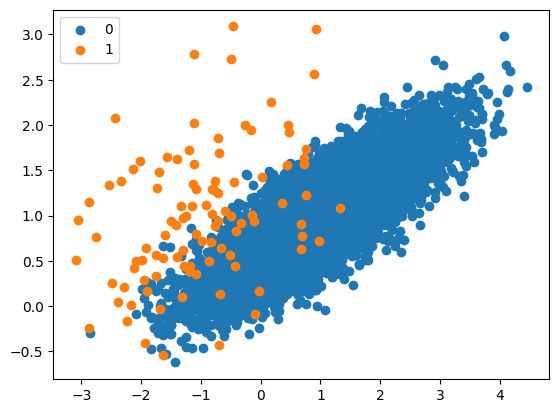

In [10]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [11]:
X_df_sm=pd.DataFrame(X,columns=('X1','X2'))
Y_df_sm=pd.DataFrame(y)
SM_=pd.merge(X_df_sm,Y_df_sm,how='left',right_index=True, left_index=True)
SM_

,X1,X2,0
0,0.222014,0.540207,0
1,1.347439,1.412824,0
2,0.537238,0.372730,0
3,2.134462,1.404819,0
4,2.315827,1.356858,0
...,...,...,...
9995,2.440385,1.695643,0
9996,-0.790502,0.194243,0
9997,1.878130,0.829500,0
9998,2.585933,1.927995,0


In [12]:
#!pip install imbalanced-learn

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


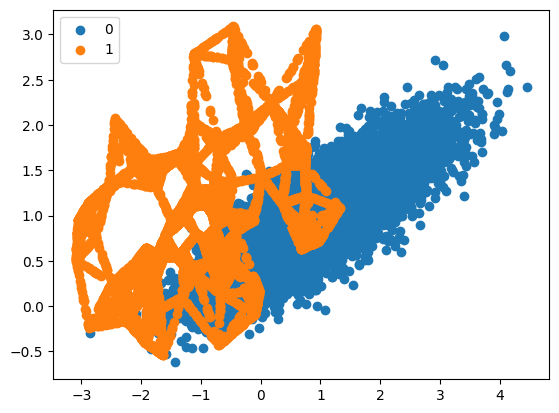

In [13]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


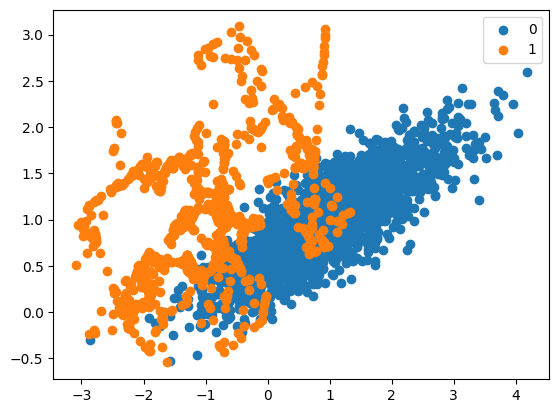

In [14]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### K means Clustering

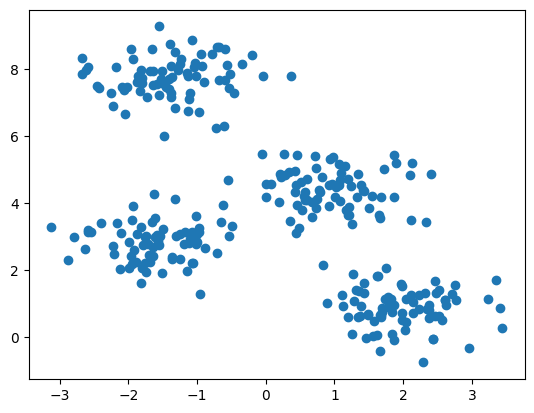

In [15]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

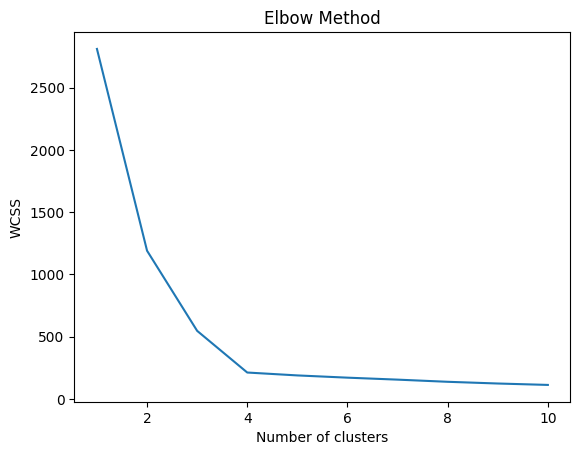

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

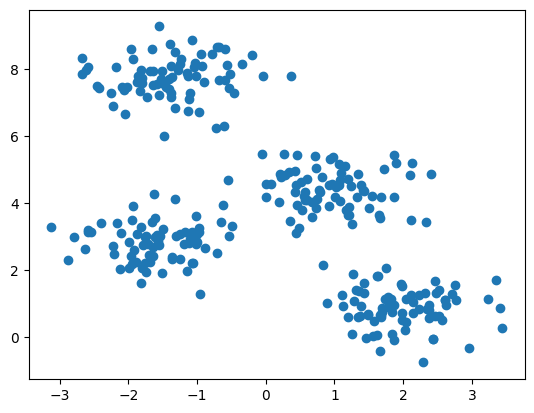

In [17]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
plt.scatter(X[:,0], X[:,1])

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [18]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [19]:
#import the dataset
from sklearn.datasets import load_iris
iris = load_iris()
# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..
# the original dataset would probably call this ['Species']
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [20]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [21]:
x = df.iloc[:, [0,1,2,3]].values

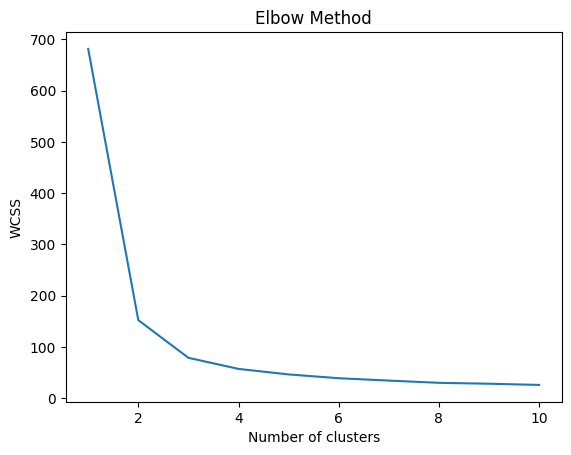

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans5 = KMeans(n_clusters=3)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
df_y=pd.DataFrame(y_kmeans5)
Train_clust=pd.merge(df,df_y,how='left',right_index=True, left_index=True)
Train_clust[['target',0]] = Train_clust[['target',0]].astype('int64')
Train_clust

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,0
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


There are couple of ways to validate your unsupervised solution
1. Visually and
2. By using your business domain knowledge and validate whether the data points in same or different clusters are making sense

In [25]:
# This is not the right approach as we don't get the value of Y in unsupervised problems
# from sklearn.metrics import accuracy_score
# score = accuracy_score(Train_clust['target'],df_y)
# print('Accuracy:{0:f}'.format(score))

#### Inertia is not a normalized metric.

The lower values of inertia are better and zero is optimal.

But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

We can calculate model inertia as follows:-

In [26]:
print(kmeans5.inertia_)

78.851441426146


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

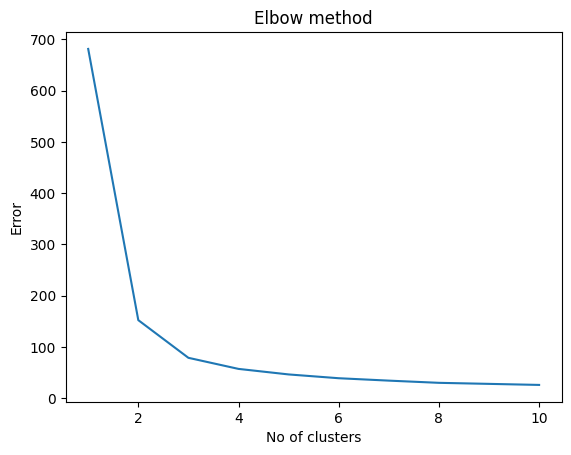

In [27]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [28]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)
print(kmeans3.inertia_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
78.851441426146


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
y_kmeans3_df = pd.DataFrame(y_kmeans3)
y_kmeans3_df

,0
0,1
1,1
2,1
3,1
4,1
...,...
145,2
146,0
147,2
148,2


In [30]:
kmeans3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

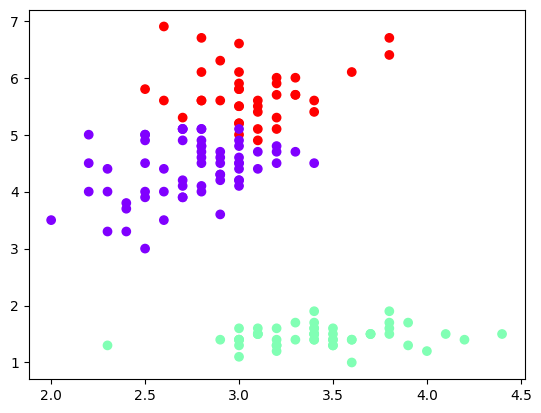

In [31]:
plt.scatter(x[:,1],x[:,2],c=y_kmeans3,cmap='rainbow')

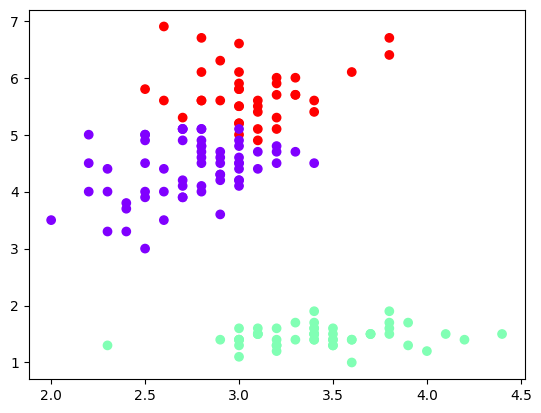

In [32]:
plt.scatter(x[:,1],x[:,2],c=y_kmeans3,cmap='rainbow')

### DBSCAN to detect outliers

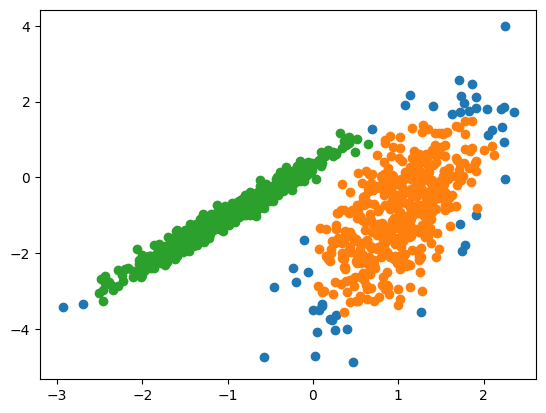

In [33]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = DBSCAN(eps=0.3, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [34]:
yhat

array([ 0,  0,  0, -1,  0,  1,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  0,  1,  1,  0,
        1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  1,
        1,  0,  0,  1,  1,  1,  0,  0,  1,  0,  1,  0,  1,  1,  1,  0,  0,
        0,  0,  1,  1,  0,  1,  1,  0,  1,  0,  0,  1,  1,  1,  0,  1,  0,
        0,  1,  1, -1,  1,  1,  0,  0, -1,  1,  1,  1,  0,  1,  1,  1,  1,
        0,  1,  0,  0,  1,  0,  0,  1, -1,  1, -1,  0,  0,  0,  0,  1,  1,
        1,  0,  1,  1,  0,  0,  0,  1,  1,  1,  1, -1, -1,  0,  0,  0,  0,
        1,  0,  0,  1,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,
        0,  1,  0,  1, -1,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  1,  1,  1,  1,  1,  1,  0,  0,  0, -1,  0,  1,  1,
        0,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0, -1,  0,  0,  0,  1,  0,
        1,  0,  0,  1,  1

In [35]:
yhat_DF= pd.DataFrame(yhat)
X_DF= pd.DataFrame(X)
import pandas as pd
result_dbscan = pd.concat([X_DF, yhat_DF], axis=1)
result_dbscan
# result_dbscan[result_dbscan[0]==-1]

,0,1,0
0,1.225160,-0.951731,0
1,1.016304,-1.725175,0
2,0.335340,-1.724896,0
3,1.786348,-1.782653,-1
4,1.016751,1.062569,0
...,...,...,...
995,0.929594,-0.743331,0
996,-0.338431,-0.343315,1
997,1.542708,-0.055665,0
998,0.816646,-1.250919,0


#### KNN Calssifier

In [36]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Loading data
irisData = load_iris()

# Create feature and target arrays
X = irisData.data
y = irisData.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.9666666666666667


#### But how to decide the right k-value for the dataset? Obviously, we need to be familiar to data to get the range of expected k-value, but to get the exact k-value we need to test the model for each and every expected k-value.

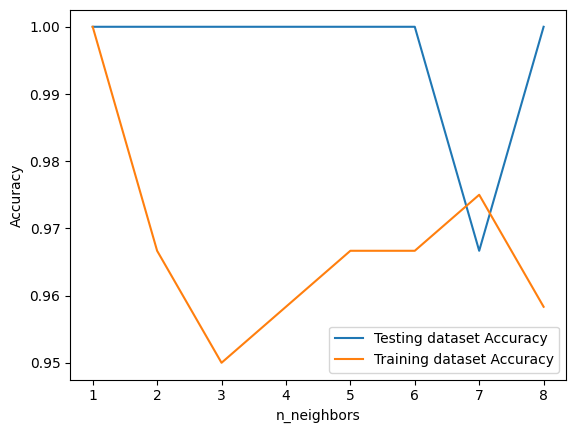

In [37]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

irisData = load_iris()

# Create feature and target arrays
X = irisData.data
y = irisData.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# train_accuracy = []
# test_accuracy = []

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

#     train_accuracy.append(knn.score(X_train, y_train))
#     test_accuracy.append(knn.score(X_test, y_test))

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()